These datasets can be viewed as classification or regression tasks. The classes are ordered and not balanced (e.g. there are munch more normal wines than excellent or poor ones). Outlier detection algorithms could be used to detect the few excellent or poor wines. Also, we are not sure if all input variables are relevant. So it could be interesting to test feature selection methods.

Two datasets were combined and few values were randomly removed.

Attribute Information:

For more information, read [Cortez et al., 2009].
Input variables (based on physicochemical tests):
#1 - fixed acidity
#2 - volatile acidity
#3 - citric acid
#4 - residual sugar
#5 - chlorides
#6 - free sulfur dioxide
#7 - total sulfur dioxide
#8 - density
#9 - pH
#10 - sulphates
#11 - alcohol
#Output variable (based on sensory data):
#12 - quality (score between 0 and 10)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#importing data transformation libraries
from sklearn.preprocessing import StandardScaler 
from sklearn.decomposition import PCA


#importing statistics libraries
import scipy.stats as scipy_stats

#importing model building algorithms
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier

#importing model evaluation algorithms
from sklearn.metrics import accuracy_score,confusion_matrix

#hyper parammeter tuening libs
from  sklearn.model_selection import GridSearchCV,RandomizedSearchCV




In [53]:
df=pd.read_csv("winequality.csv")
df.drop(columns='type',axis=1,inplace=True)
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [54]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4890.000000,4891.000000,4896.000000,4896.000000,4896.000000,4898.000000,4898.000000,4898.000000,4891.000000,4896.000000,4898.000000,4898.000000
mean,6.855532,0.278252,0.334250,6.393250,0.045778,35.308085,138.360657,0.994027,3.188203,0.489835,10.514267,5.877909
std,0.843808,0.100811,0.120985,5.072275,0.021850,17.007137,42.498065,0.002991,0.151014,0.114147,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [55]:
print("3% of total data is : ",(3*len(df))/100)
Q1=df.quantile(0.25)
Q3=df.quantile(0.75)
iqr=df.quantile(0.75)-df.quantile(0.25)
((df < (Q1 - 1.5 * iqr)) | (df > (Q3 + 1.5 * iqr))).sum()

3% of total data is :  146.94


fixed acidity           119
volatile acidity        186
citric acid             269
residual sugar            7
chlorides               212
free sulfur dioxide      50
total sulfur dioxide     19
density                   5
pH                       75
sulphates               124
alcohol                   0
quality                 200
dtype: int64

In [56]:
#Outlier treatment
def oulier_using_iqr(df):
    for col in df.columns.to_list():
        q1=df[col].quantile(0.25)
        q3=df[col].quantile(0.75)
        iqr=q3-q1
        ll=q1-(1.5*iqr)
        ul=q3+(1.5*iqr)
        median=df[col].median()
        if len([x for x in df[col] if x<ll or x>ul])>0:
            df.loc[(df[col]<ll)|(df[col]>ul),col]=df[col].median()

In [57]:
oulier_using_iqr(df)

In [58]:
print("5% of total data is : ",(5*len(df))/100)
Q1=df.quantile(0.25)
Q3=df.quantile(0.75)
iqr=df.quantile(0.75)-df.quantile(0.25)
((df < (Q1 - 1.5 * iqr)) | (df > (Q3 + 1.5 * iqr))).sum()

5% of total data is :  244.9


fixed acidity             0
volatile acidity         38
citric acid             115
residual sugar            0
chlorides                34
free sulfur dioxide       7
total sulfur dioxide      0
density                   0
pH                       17
sulphates                60
alcohol                   0
quality                   0
dtype: int64

In [59]:
df.shape

(4898, 12)

# Handling missing values

In [60]:
df.isna().sum()

fixed acidity           8
volatile acidity        7
citric acid             2
residual sugar          2
chlorides               2
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      7
sulphates               2
alcohol                 0
quality                 0
dtype: int64

In [61]:
df.dropna(inplace=True)

# Pair plot

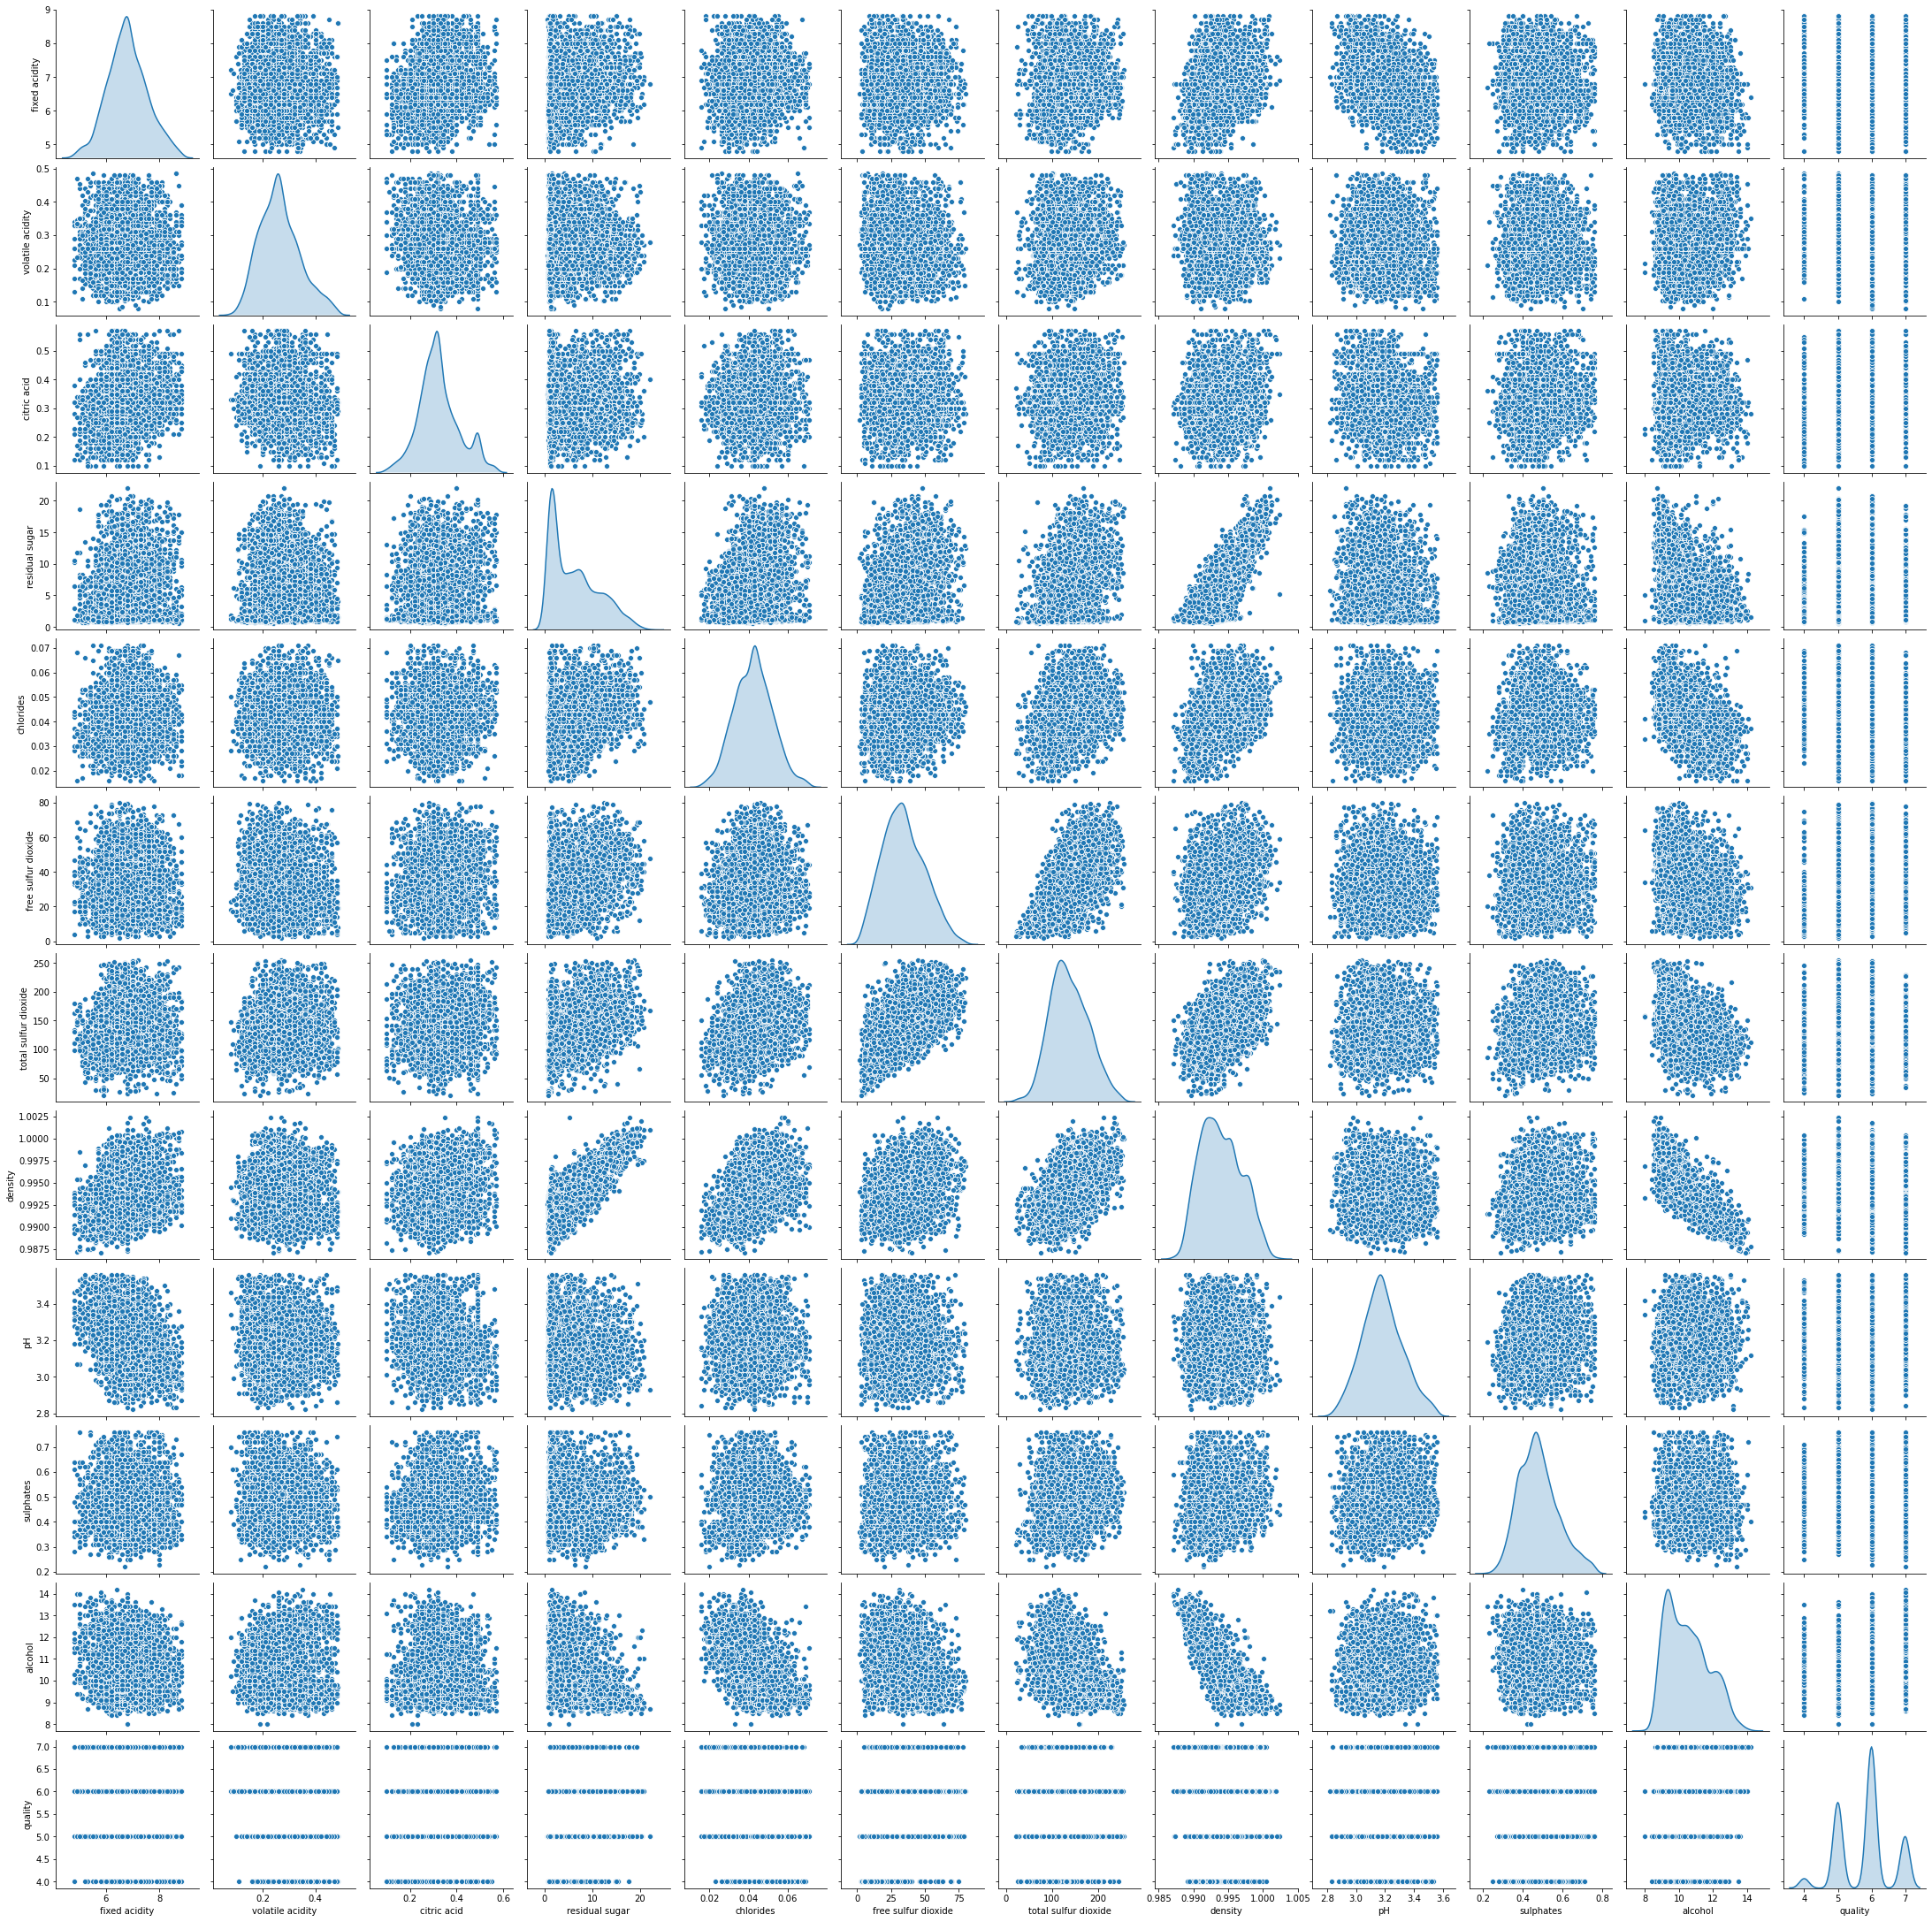

In [62]:
sns.pairplot(df,diag_kind='kde') #Kde=kernel density plots

# Multicolinearity

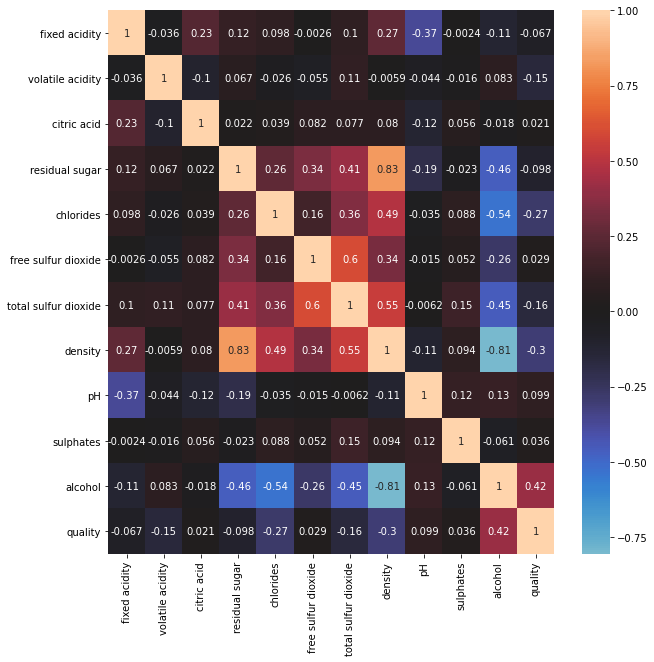

In [63]:
fig,ax1=plt.subplots(figsize=(10,10))
sns.heatmap(df.corr(),center=0,annot=True)

# Identifing  X and Y

In [64]:
X=df.drop(columns='quality')
y=df[['quality']]
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9


### Handling y variable

6.0    0.489733
5.0    0.297331
7.0    0.179671
4.0    0.033265
Name: quality, dtype: float64

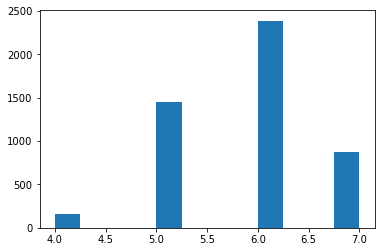

In [69]:
y=df['quality']
plt.hist(y, bins=12)
y.value_counts(normalize=True)

1.0    0.489733
0.0    0.330595
2.0    0.179671
Name: quality, dtype: float64

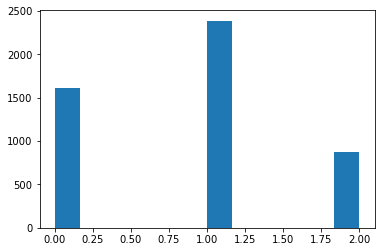

In [70]:
y=y.replace([4,5,6,7],[0,0,1,2])
plt.hist(y, bins=12)
y.value_counts(normalize=True)


In [75]:
y.head()

0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
Name: quality, dtype: float64

# Appling PCA 

In [76]:
scale=StandardScaler().fit_transform(X)
pca=PCA()
p_comp=pca.fit_transform(scale)
p_comp=pd.DataFrame(p_comp)
p_comp.head()

,0,1,2,3,4,5,6,7,8,9,10
0,3.785924,0.911772,1.027076,0.051627,0.517032,-0.445983,1.500780,-0.594113,0.236492,0.090427,0.063710
1,-0.444112,-0.704631,-0.008634,-1.159525,-0.994680,1.252830,-0.080680,-0.092126,-0.820465,0.195272,0.058831
2,0.389105,1.310497,-0.321631,-0.668553,-0.468569,0.974695,0.183545,1.244577,0.392874,-0.969718,-0.170845
3,1.909945,-0.049642,-0.026558,-0.292758,0.709605,0.594262,-1.123384,0.480327,0.557919,0.315838,-0.080190
4,1.909945,-0.049642,-0.026558,-0.292758,0.709605,0.594262,-1.123384,0.480327,0.557919,0.315838,-0.080190


In [77]:
pca.explained_variance_ratio_

array([0.31373464, 0.13408728, 0.10669611, 0.0968833 , 0.08942106,
       0.07049457, 0.06571697, 0.05576794, 0.03707349, 0.0279034 ,
       0.00222124])

In [78]:
np.cumsum(pca.explained_variance_ratio_)

array([0.31373464, 0.44782192, 0.55451803, 0.65140133, 0.74082239,
       0.81131696, 0.87703393, 0.93280187, 0.96987536, 0.99777876,
       1.        ])

In [80]:
pca_df=p_comp.iloc[:,:-3]
pca_df.head()

,0,1,2,3,4,5,6,7
0,3.785924,0.911772,1.027076,0.051627,0.517032,-0.445983,1.500780,-0.594113
1,-0.444112,-0.704631,-0.008634,-1.159525,-0.994680,1.252830,-0.080680,-0.092126
2,0.389105,1.310497,-0.321631,-0.668553,-0.468569,0.974695,0.183545,1.244577
3,1.909945,-0.049642,-0.026558,-0.292758,0.709605,0.594262,-1.123384,0.480327
4,1.909945,-0.049642,-0.026558,-0.292758,0.709605,0.594262,-1.123384,0.480327


In [123]:
xgb=XGBClassifier()
rf=RandomForestClassifier()
gb=GradientBoostingClassifier()

In [124]:
def model(model):
    model.fit(xtrain,ytrain)
    pre=model.predict(xtest)
    acc=accuracy_score(ytest,pre)
    print(model,' : ',acc)
    print(' \n',confusion_matrix(ytest,pre))

In [125]:
xtrain,xtest,ytrain,ytest=train_test_split(pca_df,y,random_state=0)
print("PCA DATA")
model(xgb)
model(rf)

PCA DATA
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)  :  0.6789819376026273
 
 [[261 109   4]
 [104 465  54]
 [  8 112 101]]
RandomForestClassifier()  :  0.7126436781609196
 
 [[264 108   2]
 [ 93 507  23]
 [  6 118  97]]


In [126]:
xtrain,xtest,ytrain,ytest=train_test_split(X,y,random_state=0)
print("OriginalDATA")
model(xgb)
model(rf)

OriginalDATA
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)  :  0.7134646962233169
 
 [[272  96   6]
 [ 88 484  51]
 [  4 104 113]]
RandomForestClassifier()  :  0.7413793103448276
 
 [[275  99   0]
 [ 77 524  22]
 [  2 115 104]]


In [25]:
# without PCA we are getting good result by this multicoliearity is not getting effected
#so hear we built a model with original data only

# Feature selection 

In [85]:
# feature importance
from sklearn.ensemble import ExtraTreesClassifier
a=ExtraTreesClassifier()
a.fit(X,y)
a.feature_importances_

array([0.07778804, 0.1044817 , 0.08137398, 0.08370916, 0.08647243,
       0.09048237, 0.08456729, 0.0981328 , 0.08204779, 0.07988697,
       0.13105749])

In [86]:
def ranf(xtrain,xtest,ytrain,ytest):
    model=RandomForestClassifier(n_estimators=500)
    model.fit(xtrain,ytrain)
    pred=model.predict(xtest)
    result=accuracy_score(pred,ytest)
    print(result)

In [92]:
xtrain,xtest,ytrain,ytest=train_test_split(X,y,random_state=100)
ranf(xtrain,xtest,ytrain,ytest)

0.722495894909688


In [89]:
from sklearn.feature_selection import RFE
for index in range(1,12):
    sel=RFE(RandomForestClassifier(),n_features_to_select=index)
    sel.fit(xtrain,ytrain)
    xtrain_rfe=sel.transform(xtrain)
    xtest_rfe=sel.transform(xtest)
    print("no of features selected ",index)
    ranf(xtrain_rfe,xtest_rfe,ytrain,ytest)
    print(xtrain.columns[sel.get_support()])
    print()

no of features selected  1
0.5221674876847291
Index(['density'], dtype='object')

no of features selected  2
0.6297208538587848
Index(['total sulfur dioxide', 'density'], dtype='object')

no of features selected  3
0.6666666666666666
Index(['residual sugar', 'total sulfur dioxide', 'density'], dtype='object')

no of features selected  4
0.6568144499178982
Index(['residual sugar', 'total sulfur dioxide', 'density', 'alcohol'], dtype='object')

no of features selected  5
0.6650246305418719
Index(['residual sugar', 'free sulfur dioxide', 'total sulfur dioxide',
       'density', 'alcohol'],
      dtype='object')

no of features selected  6
0.7060755336617406
Index(['volatile acidity', 'residual sugar', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'alcohol'],
      dtype='object')

no of features selected  7
0.7060755336617406
Index(['volatile acidity', 'residual sugar', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'alcohol'],
      dtype='obje

In [88]:
#From Featyre seclection we can see all featyre are plaing importent role
#X.drop(columns='density',axis=1,inplace=True)

In [41]:
#X=pd.DataFrame(X,columns=['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar','chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'pH','sulphates', 'alcohol'])


In [93]:
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,pH,sulphates,alcohol
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,3.00,0.45,8.8
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,3.30,0.49,9.5
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,3.26,0.44,10.1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,3.19,0.40,9.9
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,3.19,0.40,9.9


In [148]:
X.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,pH,sulphates,alcohol
count,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.00000,4870.000000,4870.000000
mean,6.806581,0.265602,0.324715,6.355164,0.042433,34.632238,137.980185,3.18246,0.480228,10.516772
std,0.738121,0.076487,0.086655,4.945257,0.009683,15.326382,41.299482,0.13930,0.098272,1.231251
min,4.800000,0.080000,0.100000,0.600000,0.016000,2.000000,21.000000,2.82000,0.220000,8.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,3.09000,0.410000,9.500000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,3.18000,0.470000,10.400000
75%,7.300000,0.310000,0.370000,9.837500,0.049000,45.000000,167.000000,3.27000,0.540000,11.400000
max,8.800000,0.485000,0.570000,22.000000,0.071000,80.000000,255.000000,3.56000,0.760000,14.200000


# Cross validation

In [94]:
from sklearn.model_selection import StratifiedKFold
def skf(dt,X=X,y=y):
    acc_list_dt=[]
    st=StratifiedKFold(n_splits=5,shuffle=True,random_state=50)
    st.get_n_splits(X,y)
    for train_index,test_index in st.split(X,y):
        x1_train,x1_test=X.iloc[train_index],X.iloc[test_index]
        y1_train,y1_test=y.iloc[train_index],y.iloc[test_index]
        dt.fit(x1_train,y1_train)
        y_pred=dt.predict(x1_test)
        score1=accuracy_score(y1_test,y_pred)
        acc_list_dt.append(score1)

    return acc_list_dt
    

In [99]:
rf=RandomForestClassifier()
acc=(skf(rf))

In [101]:
acc,min(acc),max(acc)

([0.742299794661191,
  0.7217659137577002,
  0.7217659137577002,
  0.7063655030800822,
  0.7238193018480493],
 0.7063655030800822,
 0.742299794661191)

# Hyper parameter optimization

In [109]:
def hpt(grid_or_random,estimator,param,X=X,Y=y):
    if grid_or_random=='grid':
        perform_obj=GridSearchCV(estimator,param,n_jobs=-1)
    elif grid_or_random=='random':
        perform_obj=RandomizedSearchCV(estimator,param,scoring=None,n_jobs=-1)
    
    obj_predict=perform_obj.fit(X,y)
    result=obj_predict.best_estimator_
    print(result)
    return result

In [110]:
xgb=RandomForestClassifier()
xgb_param={'n_estimators':[400,450,500,550],
           'criterion':['gini','entropy'] }
xgb_random=hpt('grid',xgb,xgb_param)
score_xgb_random=skf(xgb_random,X,y)


RandomForestClassifier(criterion='entropy', n_estimators=500)


In [111]:
print("XGB RandomSearchCV :",min(score_xgb_random) )
print("XGB RandomSearchCV :",max(score_xgb_random) )

XGB RandomSearchCV : 0.715605749486653
XGB RandomSearchCV : 0.7412731006160165


# Final model training using random forest

In [112]:
model=RandomForestClassifier(n_estimators=500,criterion='entropy',n_jobs=-1)
model.fit(X,y)

RandomForestClassifier(criterion='entropy', n_estimators=500, n_jobs=-1)

In [113]:
import joblib
filename = 'redwine.pkl'
joblib.dump(model, filename)

['redwine.pkl']

In [117]:
loaded_model = joblib.load('redwine.pkl')
result = loaded_model.score(xtest, ytest)


# Using MLP Neural Networks

In [145]:
from sklearn.neural_network import MLPClassifier

In [139]:
nnc=MLPClassifier(
    hidden_layer_sizes=(150,100),activation='relu',solver='adam',max_iter=1000).fit(xtrain, ytrain)

In [146]:
nnc.score(xtest, ytest)

0.5303776683087028